# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'&q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url,city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | labrador city
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | benghazi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | sisimiut
Processing Record 11 of Set 1 | st. john's
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | barah
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | englewood
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 

In [105]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.rename(columns={'City.1': 'City'})
# Convert the Max Temperature from Kelvin to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df
# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [106]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-3.41,83,98,6.75,SJ,1713735174
1,labrador city,52.9463,-66.9114,-0.05,43,40,3.09,CA,1713735010
2,port elizabeth,-33.9180,25.5701,20.61,96,20,4.12,ZA,1713735175
3,san antonio de pale,-1.4014,5.6325,28.99,81,70,2.85,GQ,1713735176
4,vilyuchinsk,52.9306,158.4028,2.15,85,66,0.37,RU,1713735176


In [107]:
# Export the City_Data into a csv
city_data_df.to_csv("output data/cities.csv", index_label="City ID")

In [108]:
# Read saved data
city_data_df = pd.read_csv("output data/cities.csv", index_col="City ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-3.41,83,98,6.75,SJ,1713735174
1,labrador city,52.9463,-66.9114,-0.05,43,40,3.09,CA,1713735010
2,port elizabeth,-33.9180,25.5701,20.61,96,20,4.12,ZA,1713735175
3,san antonio de pale,-1.4014,5.6325,28.99,81,70,2.85,GQ,1713735176
4,vilyuchinsk,52.9306,158.4028,2.15,85,66,0.37,RU,1713735176


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

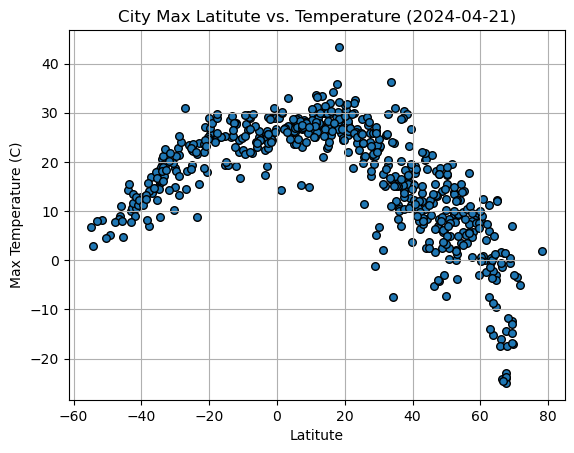

In [109]:
# Build scatter plot for latitude vs. temperature
lat_temp_df = city_data_df[['Lat','Max Temp']]
lat_temp_df
lat_temp_df.plot(kind="scatter",x='Lat',y='Max Temp',edgecolor='black',s=30)

# Incorporate the other graph properties
plt.xlabel('Latitute')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitute vs. Temperature (2024-04-21)')
plt.grid()

# Save the figure
plt.savefig("output data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

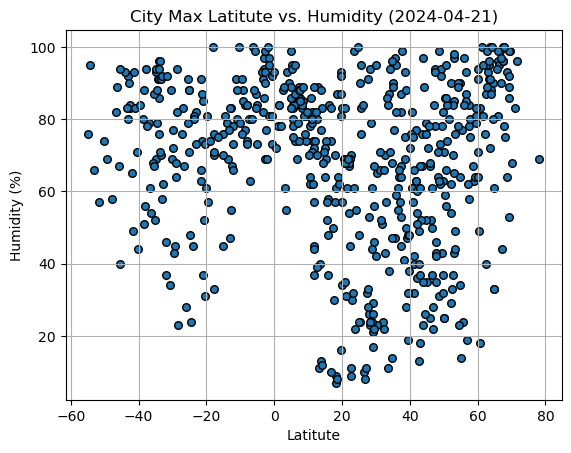

In [78]:
# Build the scatter plots for latitude vs. humidity
lat_hum_df = city_data_df[['Lat','Humidity']]
lat_hum_df
lat_hum_df.plot(kind="scatter",x='Lat',y='Humidity',edgecolor='black',s=30)

# Incorporate the other graph properties
plt.xlabel('Latitute')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitute vs. Humidity (2024-04-21)')
plt.grid()

# Save the figure
plt.savefig("output data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

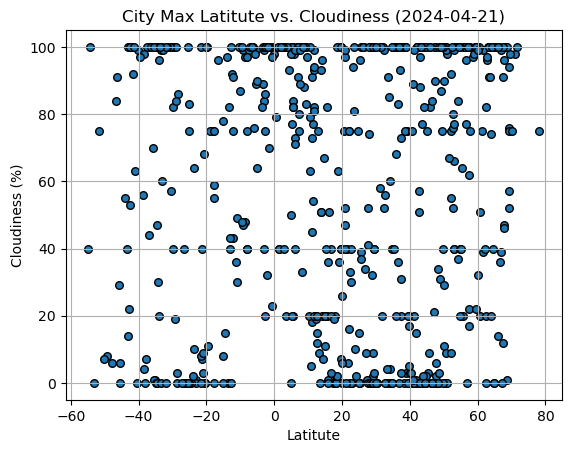

In [80]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_df = city_data_df[['Lat','Cloudiness']]
lat_cloud_df
lat_cloud_df.plot(kind="scatter",x='Lat',y='Cloudiness',edgecolor='black',s=30)

# Incorporate the other graph properties
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitute vs. Cloudiness (2024-04-21)')
plt.grid()

# Save the figure
plt.savefig("output data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

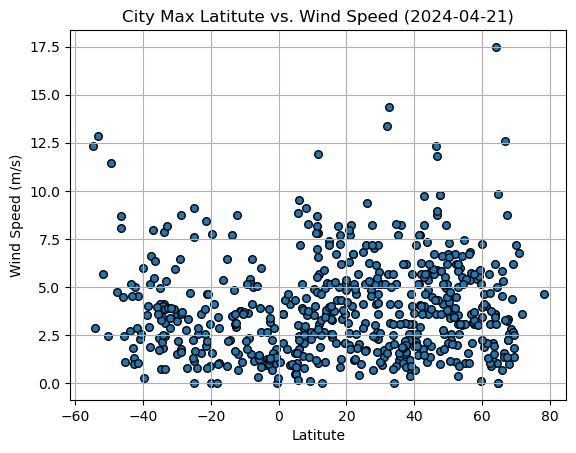

In [81]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_df = city_data_df[['Lat','Wind Speed']]
lat_wind_df
lat_wind_df.plot(kind="scatter",x='Lat',y='Wind Speed',edgecolor='black',s=30)

# Incorporate the other graph properties
plt.xlabel('Latitute')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitute vs. Wind Speed (2024-04-21)')
plt.grid()

# Save the figure
plt.savefig("output data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-3.41,83,98,6.75,SJ,1713735174
1,labrador city,52.9463,-66.9114,-0.05,43,40,3.09,CA,1713735010
4,vilyuchinsk,52.9306,158.4028,2.15,85,66,0.37,RU,1713735176
6,college,64.8569,-147.8028,12.18,33,0,0.00,US,1713734938
7,benghazi,32.1167,20.0667,25.38,24,100,13.38,LY,1713735178


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
2,port elizabeth,-33.9180,25.5701,20.61,96,20,4.12,ZA,1713735175
3,san antonio de pale,-1.4014,5.6325,28.99,81,70,2.85,GQ,1713735176
5,ushuaia,-54.8000,-68.3000,6.81,76,40,12.35,AR,1713735078
8,adamstown,-25.0660,-130.1015,22.36,71,83,9.09,PN,1713734927
11,grytviken,-54.2811,-36.5092,2.92,95,100,2.88,GS,1713734895


###  Temperature vs. Latitude Linear Regression Plot

r-value = 0.8369988997692455


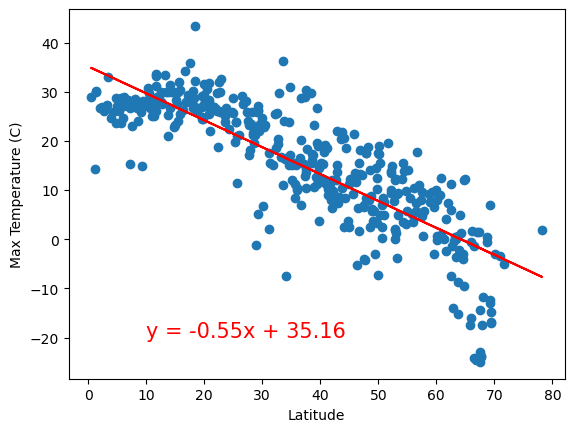

In [136]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print("r-value =", abs(rvalue))
plt.show()

r-value = 0.8222483326596128


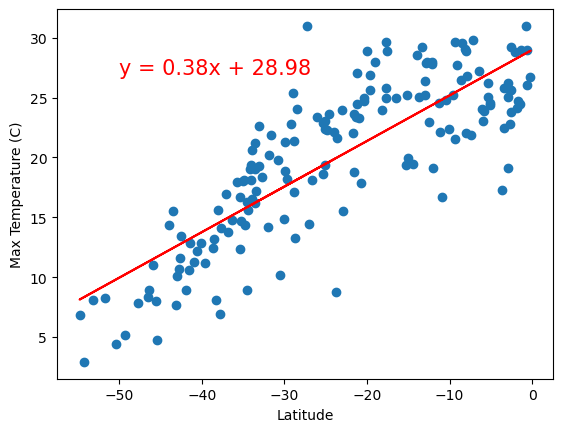

In [137]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,26.95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print("r-value =", abs(rvalue))
plt.show()

**Discussion about the linear relationship:** Latitute and Temperature have a strong correlation as the absolute value of the r-value is > 0.7 for both the northern and southern hemispheres.  

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.08954900622114018


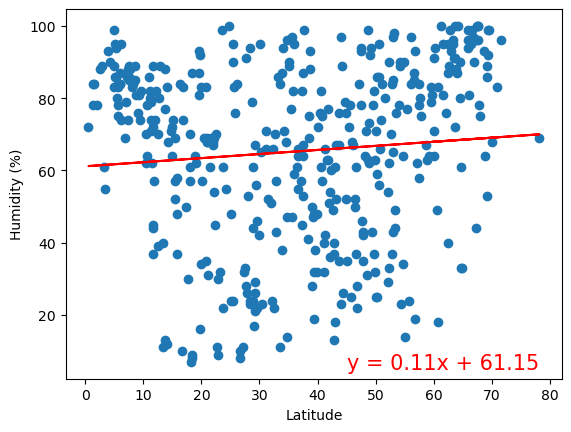

In [143]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("r-value =", abs(rvalue))
plt.show()

r-value = 0.18881907455316724


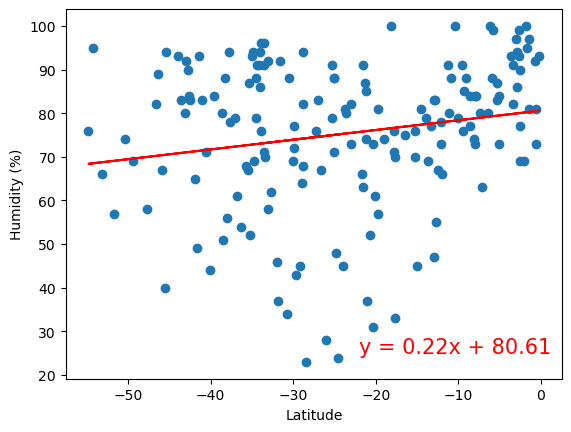

In [146]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("r-value =", abs(rvalue))
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between Latitude and Humididty. The absolute value of the r-value is less than 0.3 for both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.08966840519107669


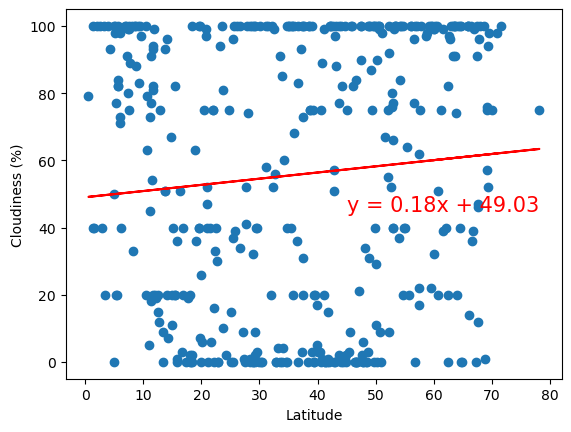

In [151]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("r-value =", abs(rvalue))
plt.show()

r-value = 0.19333248822033508


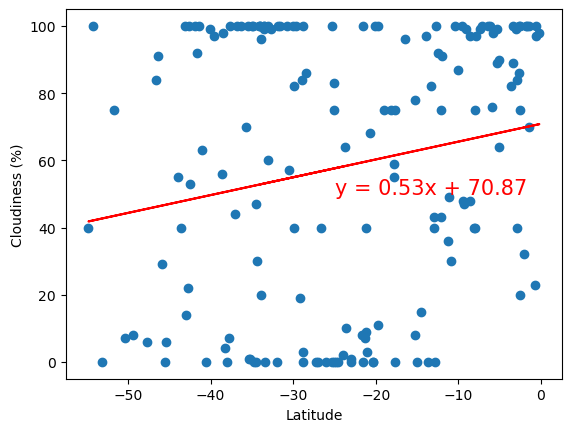

In [154]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("r-value =", abs(rvalue))
plt.show()

**Discussion about the linear relationship:** There appears to be no correlation between Latitude and Cloudiness. The absolute value of the r-value is less than 0.3 for both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.042375785852611224


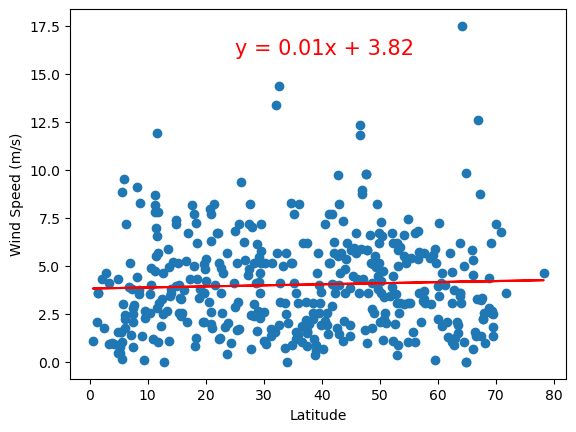

In [157]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,16),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print("r-value =", abs(rvalue))
plt.show()

r-value = 0.33553383315450297


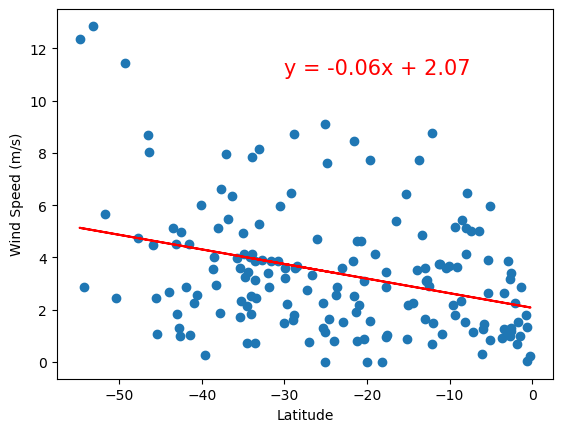

In [158]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print("r-value =", abs(rvalue))
plt.show()

**Discussion about the linear relationship:** There does not appears to be a correlation between wind speed and latitude as can be seen by the northern hemisphere r-value. The southern hemisphere r-value shows a weak correlation but it is on the lower end of the spectrum.